In [35]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import seaborn as sns
import matplotlib.dates as mdates


# Carregar dados do arquivo Data.csv
EV = pd.read_csv("Data.csv", sep=";")
EV = EV.iloc[:, :33]
# Converter a coluna "Date" para o formato de data (considerando apenas a data)
#data['Start date'] = pd.to_datetime(data['Start date'], format='%m/%d/%Y', errors='coerce')
EV['Start date'] = pd.to_datetime(EV['Start date'].str.split('|').str[0].str.strip(), format='%m/%d/%Y', errors='coerce')
print("Data.csv antes:")
print(EV.head())


# Carregar  dados do arquivo PLUS.csv
plus = pd.read_csv("PLUS.csv", sep=";")
plus = plus.drop(columns=['Unnamed: 2'])
# Converter a coluna "Date" para o formato de data (considerando apenas a data)
plus['Date'] = pd.to_datetime(plus['Date'], errors='coerce')

print("\nPLUS.csv antes:")
print(plus.head())

# Merge os dois DataFrames usando as colunas de data 
merged_data = pd.merge_asof(EV.sort_values('Start date'), plus.sort_values('Date'), left_on='Start date', right_on='Date', direction='nearest')

merged_data = merged_data.drop(columns=['Date'])

# Salvar o resultado no arquivo Data_merged.csv
merged_data.to_csv("Data_merged.csv", index=False, sep=";")
print(merged_data.head())



Data.csv antes:
  Start date           Stop date Network          Fleet report_ev   Group  \
0 2023-05-31  05/31/2023 | 19:08    EVIO  Frota Capwatt  AA-99-AA  Others   
1 2023-05-31  05/31/2023 | 13:46    EVIO  Frota Capwatt  AA-99-AA  Others   
2 2023-05-30  05/30/2023 | 13:29    EVIO  Frota Capwatt  AA-99-AA  Others   
3 2023-05-26  05/26/2023 | 19:13    EVIO  Frota Capwatt  AA-99-AA  Others   
4 2023-05-24  05/24/2023 | 19:17    EVIO  Frota Capwatt  AA-99-AA  Others   

         User   Charging Station     City Duration (min)  ...  \
0  José Silva  CAP_SON_MAI_00010  Moreira        321,983  ...   
1  José Silva  CAP_SON_MAI_00010  Moreira            0,1  ...   
2  José Silva  CAP_SON_MAI_00004     Maia          237,1  ...   
3  José Silva  CAP_SON_MAI_00002     Maia          22,55  ...   
4  José Silva  CAP_SON_MAI_00002     Maia           35,3  ...   

  MOBIE TAR total (€) MOBIE CPO total (€)  MOBIE E-mobility support (€)  \
0                   -                   -              

C:\Users\miguel.preto\AppData\Local\Temp\ipykernel_8052\3802156538.py:27: UserWarning: Parsing '13.06.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  plus['Date'] = pd.to_datetime(plus['Date'], errors='coerce')
C:\Users\miguel.preto\AppData\Local\Temp\ipykernel_8052\3802156538.py:27: UserWarning: Parsing '14.06.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  plus['Date'] = pd.to_datetime(plus['Date'], errors='coerce')
C:\Users\miguel.preto\AppData\Local\Temp\ipykernel_8052\3802156538.py:27: UserWarning: Parsing '15.06.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  plus['Date'] = pd.to_datetime(plus['Date'], errors='coerce')
C:\Users\miguel.preto\AppData\Local\Temp\ipykernel_8052\3802156538.py:27: UserWarning: Parsing '16.06.2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for con

In [36]:
# Carregar os dados do arquivo Data.csv
EV = pd.read_csv("Data_merged.csv", sep=";")
EV2 = pd.read_csv("Data.csv", sep=";")

EV['Start date'] = EV2['Start date']

# Convert strings to float
EV['Duration (min)'] = EV['Duration (min)'].str.replace(',', '.').astype(float)
EV['Temp'] = EV['Temp'].str.replace(',', '.').str.replace(',', '.').astype(float)
EV['Plus'] = EV['Plus'].str.replace(',', '.').str.replace(',', '.').astype(float)
EV['Total Energy (kWh)'] = EV['Total Energy (kWh)'].str.replace(',', '.').astype(float)
EV['Start date'] = pd.to_datetime(EV['Start date'], format='%m/%d/%Y | %H:%M')
EV['Stop date'] = pd.to_datetime(EV['Stop date'], format='%m/%d/%Y | %H:%M')

# Crie uma nova coluna 'Period of Day' com base na hora
EV['Period of Day'] = pd.cut(EV['Start date'].dt.hour, bins=[0, 12, 18, 24], labels=['Manhã', 'Tarde', 'Noite'])

# Adicione a coluna 'Day of Week'
EV['Day of Week'] = EV['Start date'].dt.day_name()

# Crie uma nova coluna 'Season' com base no mês (usando o hemisfério norte como referência)
EV['Month'] = EV['Start date'].dt.month
EV['Season'] = EV['Month'].apply(lambda x: 'Inverno' if x in [1, 2, 12] else ('Primavera' if x in [3, 4, 5] else ('Verão' if x in [6, 7, 8] else 'Outono')))

# Crie uma nova coluna 'Período Escolar' com base no mês
EV['Período Escolar'] = EV['Month'].apply(lambda x: 'Férias' if x in [7, 8] else 'Período Escolar')

# Exibindo o DataFrame resultante
print(EV.head())
print(EV['Temp'])

           Start date           Stop date Network          Fleet report_ev  \
0 2023-05-31 13:46:00 2022-06-07 17:36:00    EVIO  Frota Capwatt  AA-99-AA   
1 2023-05-31 13:46:00 2022-06-15 18:57:00    EVIO  Frota Capwatt  AA-99-AA   
2 2023-05-30 09:32:00 2022-06-15 15:51:00    EVIO  Frota Capwatt  AA-99-AA   
3 2023-05-26 18:51:00 2022-06-15 18:49:00    EVIO  Frota Capwatt  AA-99-AA   
4 2023-05-24 18:42:00 2022-07-01 18:44:00    EVIO  Frota Capwatt  AA-99-AA   

    Group        User   Charging Station  City  Duration (min)  ...  \
0  Others  José Silva  CAP_SON_MAI_00004  Maia         224.517  ...   
1  Others  José Silva  CAP_SON_MAI_00002  Maia           6.167  ...   
2  Others  José Silva  CAP_SON_MAI_00002  Maia          43.467  ...   
3  Others  José Silva  CAP_SON_MAI_00002  Maia          12.100  ...   
4  Others  José Silva  CAP_SON_MAI_00002     -           0.033  ...   

   VAT rate (%) Cost incl. IVA         Status   Temp Plus Period of Day  \
0            23           5,5

In [28]:
# Aplicando one-hot encoding para as colunas categóricas
EV = pd.get_dummies(EV, columns=['Period of Day', 'Day of Week', 'Season', 'Período Escolar', 'Charging Station'], drop_first=True)

# Exibindo o DataFrame resultante
print(EV.head())

           Start date           Stop date Network          Fleet report_ev  \
0 2023-05-31 13:46:00 2022-06-07 17:36:00    EVIO  Frota Capwatt  AA-99-AA   
1 2023-05-31 13:46:00 2022-06-15 18:57:00    EVIO  Frota Capwatt  AA-99-AA   
2 2023-05-30 09:32:00 2022-06-15 15:51:00    EVIO  Frota Capwatt  AA-99-AA   
3 2023-05-26 18:51:00 2022-06-15 18:49:00    EVIO  Frota Capwatt  AA-99-AA   
4 2023-05-24 18:42:00 2022-07-01 18:44:00    EVIO  Frota Capwatt  AA-99-AA   

    Group        User  City  Duration (min)  Total Energy (kWh)  ...  \
0  Others  José Silva  Maia         224.517               40.19  ...   
1  Others  José Silva  Maia           6.167                3.48  ...   
2  Others  José Silva  Maia          43.467               41.18  ...   
3  Others  José Silva  Maia          12.100               14.34  ...   
4  Others  José Silva     -           0.033                0.00  ...   

  Day of Week_Tuesday  Day of Week_Wednesday Season_Outono Season_Primavera  \
0                  

15     41.17
69     20.52
31      0.00
24     23.43
56      5.96
       ...  
106    53.17
14     40.99
92     23.80
51     21.25
102    49.16
Name: Total Energy (kWh), Length: 93, dtype: float64


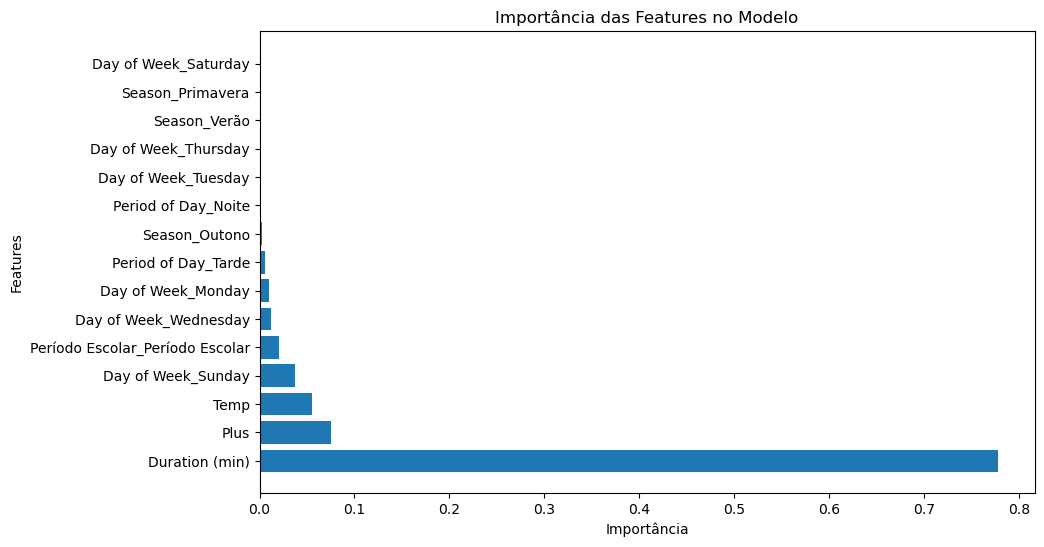

Mean Squared Error: 116.66652060598581
Root Mean Squared Error: 10.801227736048611
Mean Absolute Error: 7.451051110622447
R-squared Score: 0.6300256671223365

Previsões:
    Total Energy (kWh)
0            13.850163
1             0.353927
2            26.234464
3            36.596793
4            17.072688
5             3.566940
6            40.863385
7            30.913692
8            30.845603
9            45.582947
10            1.138317
11           28.062333
12           36.555886
13           17.896549
14           -3.715328
15           40.528645
16           17.791926
17           25.267495
18            1.870296
19           41.826164
20           33.571740
21            3.566940
22           -5.277812
23            1.122912


In [29]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# Selecionando as variáveis independentes (features) e a variável dependente (target)
features = EV[['Temp', 'Plus', 'Duration (min)'] +
               [col for col in EV.columns if 'Period of Day' in col or
                                             'Day of Week' in col or
                                             'Season' in col or
                                             'Período Escolar' in col]]
target = EV['Total Energy (kWh)']


# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Inicializando o modelo Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Treinando o modelo
model.fit(X_train, y_train)

# Obtendo a importância das features
feature_importance = model.feature_importances_

# Criando um DataFrame para melhor visualização
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importance})

# Ordenando as features pela importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotando a importância das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das Features no Modelo')
plt.show()


# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo usando o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculando e exibindo outras métricas, como RMSE e MAE, se desejado
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r2}')
print()

# Imprimir as previsões
print("Previsões:")
print(pd.DataFrame(y_pred, columns=['Total Energy (kWh)']))

In [31]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np


# Selecionando as variáveis independentes (features) e a variável dependente (target)
features = EV[['Temp', 'Plus', 'Duration (min)'] +
               [col for col in EV.columns if 'Period of Day' in col or
                                             'Day of Week' in col or
                                             'Season' in col or
                                             'Período Escolar' in col]]
target = EV['Total Energy (kWh)']


# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalizando os dados
scaler_X = StandardScaler().fit(X_train)
scaler_y = StandardScaler().fit(y_train.values.reshape(-1, 1))  # ajuste para um único output
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Inicializando o modelo de rede neural
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # saída única para 'Total Energy (kWh)'
])

# Compilando o modelo
model.compile(optimizer='adam', loss='mse')  # usando erro quadrático médio (mse)

# Treinando o modelo
model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=2, validation_split=0.2)

# Fazendo previsões no conjunto de teste
y_pred_scaled = model.predict(X_test_scaled)

# Desnormalizando as previsões
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Avaliando o desempenho do modelo usando o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculando e exibindo outras métricas, como RMSE e MAE, se desejado
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r2}')

# Imprimir as previsões
print("Previsões:")
print(pd.DataFrame(y_pred, columns=['Total Energy (kWh)']))

Epoch 1/100
37/37 [==============================] - 0s 4ms/step - loss: 1.2854 - val_loss: 1.0157
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 0.8500 - val_loss: 0.9925
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6733 - val_loss: 1.1447
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5637 - val_loss: 1.1921
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5095 - val_loss: 1.3820
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4695 - val_loss: 1.3816
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4470 - val_loss: 1.4564
Epoch 8/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4049 - val_loss: 1.5275
Epoch 9/100
37/37 [==============================] - 0s 3ms/step - loss: 0.3920 - val_loss: 1.5667
Epoch 10/100
37/37 [==============================] - 0s 3ms/step - loss: 0.3694 - val_loss: 1.6072
Epoch 11/

37/37 [==============================] - 0s 2ms/step - loss: 0.0719 - val_loss: 2.3219
Epoch 84/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0764 - val_loss: 2.4475
Epoch 85/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0697 - val_loss: 2.3040
Epoch 86/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0718 - val_loss: 2.4196
Epoch 87/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0763 - val_loss: 2.1922
Epoch 88/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0754 - val_loss: 2.4199
Epoch 89/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0630 - val_loss: 2.2994
Epoch 90/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0702 - val_loss: 2.5158
Epoch 91/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0755 - val_loss: 2.2989
Epoch 92/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0785 - val_loss: 2.5954
Epoch 93/100


In [37]:
# Mapeando categorias para números
period_of_day_mapping = {'Manhã': 1, 'Tarde': 2, 'Noite': 3}
day_of_week_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
season_mapping = {'Inverno': 1, 'Primavera': 2, 'Verão': 3, 'Outono': 4}
periodo_escolar_mapping = {'Férias': 1, 'Período Escolar': 2}

EV['Period of Day'] = EV['Period of Day'].map(period_of_day_mapping)
EV['Day of Week'] = EV['Day of Week'].map(day_of_week_mapping)
EV['Season'] = EV['Season'].map(season_mapping)
EV['Período Escolar'] = EV['Período Escolar'].map(periodo_escolar_mapping)

# Exibindo o DataFrame resultante
print(EV.head())

           Start date           Stop date Network          Fleet report_ev  \
0 2023-05-31 13:46:00 2022-06-07 17:36:00    EVIO  Frota Capwatt  AA-99-AA   
1 2023-05-31 13:46:00 2022-06-15 18:57:00    EVIO  Frota Capwatt  AA-99-AA   
2 2023-05-30 09:32:00 2022-06-15 15:51:00    EVIO  Frota Capwatt  AA-99-AA   
3 2023-05-26 18:51:00 2022-06-15 18:49:00    EVIO  Frota Capwatt  AA-99-AA   
4 2023-05-24 18:42:00 2022-07-01 18:44:00    EVIO  Frota Capwatt  AA-99-AA   

    Group        User   Charging Station  City  Duration (min)  ...  \
0  Others  José Silva  CAP_SON_MAI_00004  Maia         224.517  ...   
1  Others  José Silva  CAP_SON_MAI_00002  Maia           6.167  ...   
2  Others  José Silva  CAP_SON_MAI_00002  Maia          43.467  ...   
3  Others  José Silva  CAP_SON_MAI_00002  Maia          12.100  ...   
4  Others  José Silva  CAP_SON_MAI_00002     -           0.033  ...   

   VAT rate (%) Cost incl. IVA         Status   Temp Plus Period of Day  \
0            23           5,5

15     41.17
69     20.52
31      0.00
24     23.43
56      5.96
       ...  
106    53.17
14     40.99
92     23.80
51     21.25
102    49.16
Name: Total Energy (kWh), Length: 93, dtype: float64


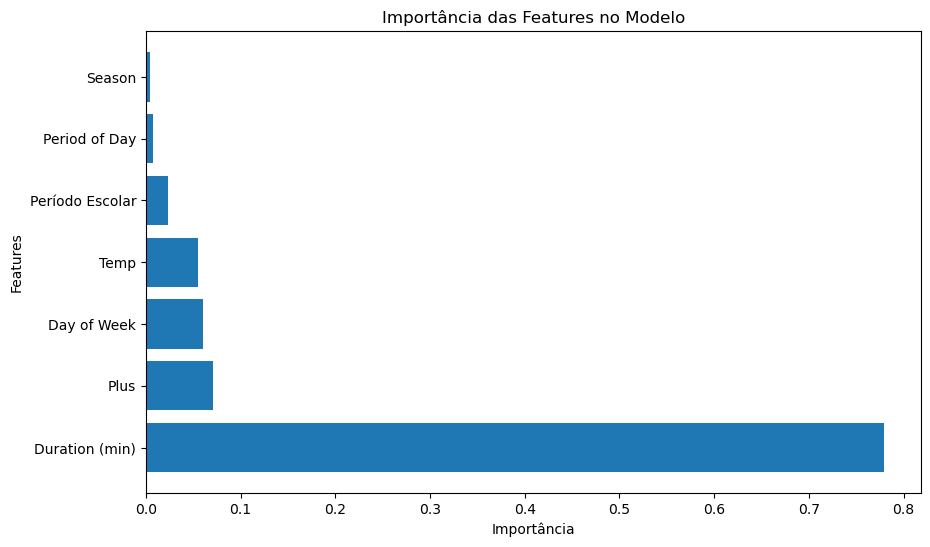

Mean Squared Error: 106.70437669831041
Root Mean Squared Error: 10.329781057617359
Mean Absolute Error: 7.182214700733859
R-squared Score: 0.6616177427849099

Previsões:
    Total Energy (kWh)
0            12.410340
1             0.446750
2            26.889377
3            37.024550
4            18.708527
5             5.029534
6            41.552865
7            31.689283
8            31.724781
9            45.434551
10            2.942791
11           26.834133
12           37.982554
13           18.225427
14           -0.378001
15           40.685602
16           22.020870
17           23.702608
18            0.302361
19           44.147450
20           31.158322
21            5.029534
22           -4.830682
23            1.274020


In [24]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# Selecionando as variáveis independentes (features) e a variável dependente (target)
#features = EV[['Temp', 'Plus', 'Day of Week', 'Season', 'Período Escolar']]
#target = EV['Total Energy (kWh)']

# Selecionando as variáveis independentes (features) e a variável dependente (target)
features = EV[['Temp', 'Plus', 'Duration (min)', 'Period of Day', 'Day of Week', 'Season', 'Período Escolar']]
target = EV['Total Energy (kWh)']


# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print(y_train)

# Inicializando o modelo Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Treinando o modelo
model.fit(X_train, y_train)

# Obtendo a importância das features
feature_importance = model.feature_importances_

# Criando um DataFrame para melhor visualização
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importance})

# Ordenando as features pela importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotando a importância das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das Features no Modelo')
plt.show()


# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo usando o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculando e exibindo outras métricas, como RMSE e MAE, se desejado
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r2}')
print()

# Imprimir as previsões
print("Previsões:")
print(pd.DataFrame(y_pred, columns=['Total Energy (kWh)']))

In [25]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np


# Selecionando as variáveis independentes (features) e a variável dependente (target)
features = EV[['Temp', 'Plus', 'Duration (min)', 'Period of Day', 'Day of Week', 'Season', 'Período Escolar']]
target = EV['Total Energy (kWh)']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalizando os dados
scaler_X = StandardScaler().fit(X_train)
scaler_y = StandardScaler().fit(y_train.values.reshape(-1, 1))  # ajuste para um único output
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Inicializando o modelo de rede neural
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # saída única para 'Total Energy (kWh)'
])

# Compilando o modelo
model.compile(optimizer='adam', loss='mse')  # usando erro quadrático médio (mse)

# Treinando o modelo
model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=2, validation_split=0.2)

# Fazendo previsões no conjunto de teste
y_pred_scaled = model.predict(X_test_scaled)

# Desnormalizando as previsões
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Avaliando o desempenho do modelo usando o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculando e exibindo outras métricas, como RMSE e MAE, se desejado
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r2}')

# Imprimir as previsões
print("Previsões:")
print(pd.DataFrame(y_pred, columns=['Total Energy (kWh)']))

Epoch 1/100
37/37 [==============================] - 1s 10ms/step - loss: 0.9301 - val_loss: 0.9175
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6820 - val_loss: 1.0940
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5863 - val_loss: 0.9577
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5387 - val_loss: 1.0508
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5244 - val_loss: 1.0114
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4844 - val_loss: 1.0587
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4699 - val_loss: 1.0788
Epoch 8/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4534 - val_loss: 1.1280
Epoch 9/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4243 - val_loss: 1.0259
Epoch 10/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4193 - val_loss: 1.1040
Epoch 11

37/37 [==============================] - 0s 3ms/step - loss: 0.1041 - val_loss: 2.0273
Epoch 84/100
37/37 [==============================] - 0s 2ms/step - loss: 0.1358 - val_loss: 2.0633
Epoch 85/100
37/37 [==============================] - 0s 2ms/step - loss: 0.1411 - val_loss: 1.8866
Epoch 86/100
37/37 [==============================] - 0s 2ms/step - loss: 0.1074 - val_loss: 1.8112
Epoch 87/100
37/37 [==============================] - 0s 2ms/step - loss: 0.1055 - val_loss: 1.9776
Epoch 88/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0938 - val_loss: 1.7690
Epoch 89/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0914 - val_loss: 1.9376
Epoch 90/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0912 - val_loss: 1.8530
Epoch 91/100
37/37 [==============================] - 0s 2ms/step - loss: 0.1052 - val_loss: 1.9174
Epoch 92/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0920 - val_loss: 2.0349
Epoch 93/100


15     41.17
69     20.52
31      0.00
24     23.43
56      5.96
       ...  
106    53.17
14     40.99
92     23.80
51     21.25
102    49.16
Name: Total Energy (kWh), Length: 93, dtype: float64


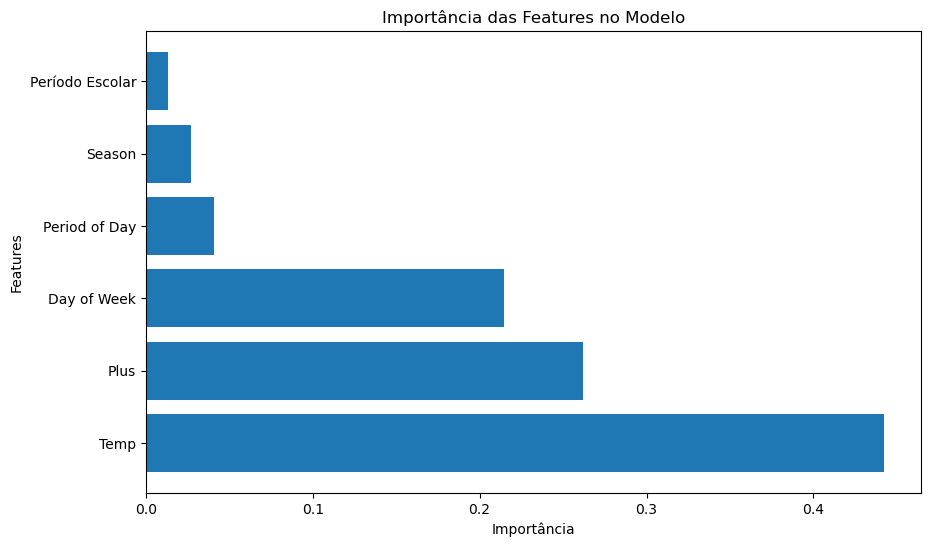

Mean Squared Error: 341.5105676801045
Root Mean Squared Error: 18.480004536798806
Mean Absolute Error: 16.62206982210484
R-squared Score: -0.08300259399041465

Previsões:
    Total Energy (kWh)
0            13.311567
1            22.828390
2            43.015277
3            24.483255
4            21.098890
5            16.411191
6            30.138772
7            31.471029
8            17.204868
9            28.283574
10           11.657076
11           20.353014
12           21.561852
13           18.492092
14           23.669228
15           22.828390
16           27.199806
17           34.498854
18           35.300895
19           26.355433
20           41.298130
21           16.730995
22           23.644201
23           39.064275


In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# Selecionando as variáveis independentes (features) e a variável dependente (target)
#features = EV[['Temp', 'Plus', 'Day of Week', 'Season', 'Período Escolar']]
#target = EV['Total Energy (kWh)']

# Selecionando as variáveis independentes (features) e a variável dependente (target)
features = EV[['Temp', 'Plus', 'Period of Day', 'Day of Week', 'Season', 'Período Escolar']]
target = EV['Total Energy (kWh)']


# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print(y_train)

# Inicializando o modelo Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Treinando o modelo
model.fit(X_train, y_train)

# Obtendo a importância das features
feature_importance = model.feature_importances_

# Criando um DataFrame para melhor visualização
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importance})

# Ordenando as features pela importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotando a importância das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das Features no Modelo')
plt.show()


# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo usando o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculando e exibindo outras métricas, como RMSE e MAE, se desejado
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r2}')
print()

# Imprimir as previsões
print("Previsões:")
print(pd.DataFrame(y_pred, columns=['Total Energy (kWh)']))

15     41.17
69     20.52
31      0.00
24     23.43
56      5.96
       ...  
106    53.17
14     40.99
92     23.80
51     21.25
102    49.16
Name: Total Energy (kWh), Length: 93, dtype: float64


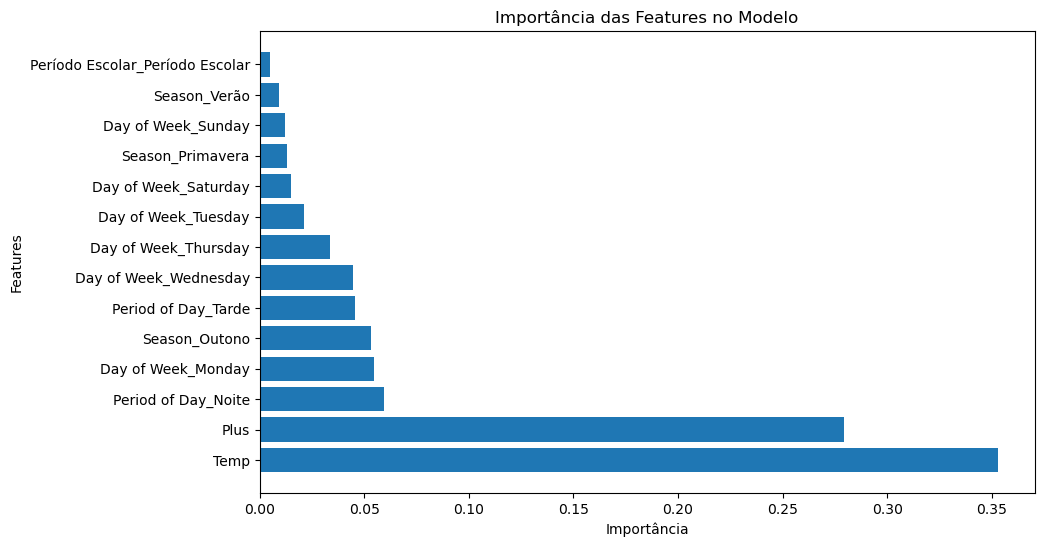

Mean Squared Error: 351.6077268936085
Root Mean Squared Error: 18.751206011710515
Mean Absolute Error: 16.362792036066427
R-squared Score: -0.11502283188361573

Previsões:
    Total Energy (kWh)
0            18.678764
1            16.840444
2            38.249890
3            23.529103
4            23.432941
5            15.621409
6            26.811839
7            25.830553
8            22.735369
9            24.943973
10           11.334580
11           22.918035
12           29.999519
13           18.418696
14           23.798872
15           16.840444
16           15.105693
17           28.895156
18           34.567057
19           27.954561
20           31.600364
21           15.621409
22           28.018343
23           34.889937


In [34]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# Selecionando as variáveis independentes (features) e a variável dependente (target)
features = EV[['Temp', 'Plus'] +
               [col for col in EV.columns if 'Period of Day' in col or
                                             'Day of Week' in col or
                                             'Season' in col or
                                             'Período Escolar' in col]]
target = EV['Total Energy (kWh)']


# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print(y_train)

# Inicializando o modelo Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Treinando o modelo
model.fit(X_train, y_train)

# Obtendo a importância das features
feature_importance = model.feature_importances_

# Criando um DataFrame para melhor visualização
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importance})

# Ordenando as features pela importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotando a importância das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das Features no Modelo')
plt.show()


# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo usando o erro médio quadrático
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculando e exibindo outras métricas, como RMSE e MAE, se desejado
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r2}')
print()

# Imprimir as previsões
print("Previsões:")
print(pd.DataFrame(y_pred, columns=['Total Energy (kWh)']))